# Bounding Box Regression Project

## Data preparation

### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2 as cv
import urllib.request
from image_augmentation import *
from image_util import *

### Demo of data augmentation

Import & display the original image.

(400, 600, 3)


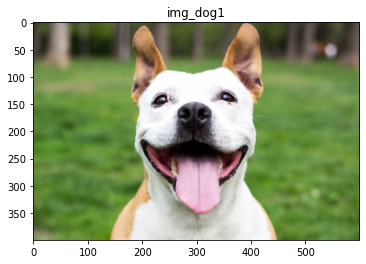

In [2]:
img_dog1 = cv.imread("dog1.jpg")
print(img_dog1.shape)
display_image(img_dog1, "img_dog1")

In [3]:
# dog1_capture = cv.VideoCapture("dog1.mp4")
# while(cv.waitKey(1) != 100):
#     isTrue, frame = dog1_capture.read()
#     frame_resized = rescaledFrame(frame, 0.1)
#     cv2_imshow(frame_resized)
# dog1_capture.release()
# cv.destroyAllWindows()

Rescale the image to a certain size.

(400, 400, 3)


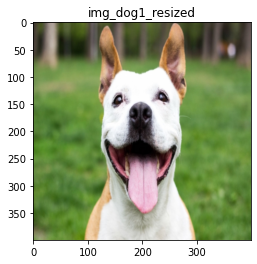

In [3]:
img_dog1_resized = rescaledFrame(img_dog1, [400, 400])
print(img_dog1_resized.shape)
display_image(img_dog1_resized, "img_dog1_resized")

Data augmentation by randomly choosing a combination of several operations (horizontal flip, horizontal shear and rotation, etc.)

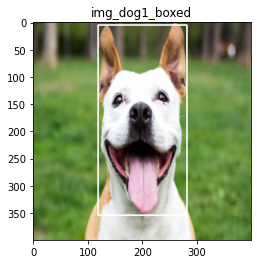

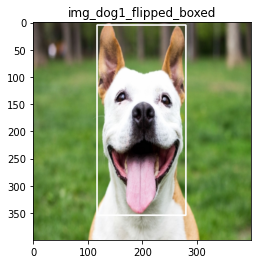

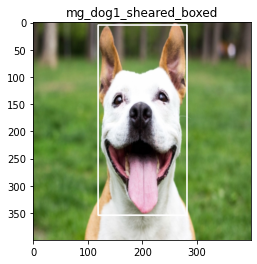

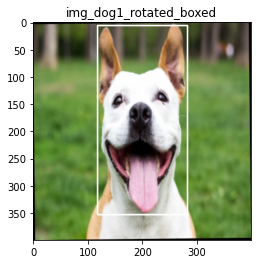

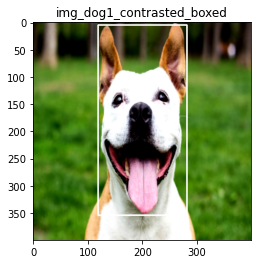

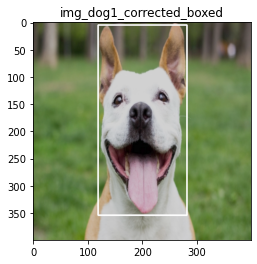

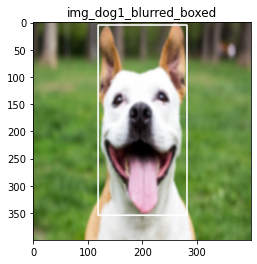

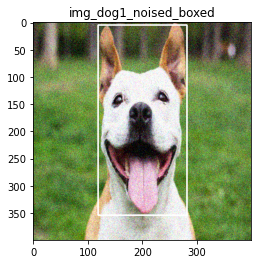

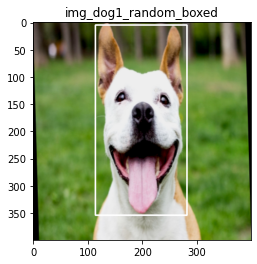

In [4]:
img_dog1_cords = np.array([[179./600, 5./400, 424./600, 354./400]]) * np.array([[400, 400, 400, 400]])

# print(img_dog1_resized.shape)
img_dog1_boxed = draw_rect(img_dog1_resized, img_dog1_cords)

img_dog1_flipped, img_dog1_cords_flipped = horizontal_flip(img_dog1_resized, img_dog1_cords)
# print(img_dog1_flipped.shape)
img_dog1_flipped_boxed = draw_rect(img_dog1_flipped, img_dog1_cords_flipped)

img_dog1_sheared, img_dog1_cords_sheared = random_horizontal_shear(img_dog1_resized, img_dog1_cords)
# print(img_dog1_sheared.shape)
img_dog1_sheared_boxed = draw_rect(img_dog1_sheared, img_dog1_cords_sheared)

img_dog1_rotated, img_dog1_cords_rotated = random_rotate(img_dog1_resized, img_dog1_cords)
# print(img_dog1_rotated.shape)
img_dog1_rotated_boxed = draw_rect(img_dog1_rotated, img_dog1_cords_rotated)

img_dog1_contrasted, img_dog1_cords_contrasted = change_contrast(img_dog1_resized, img_dog1_cords)
# print(img_dog1_contrasted.shape)
img_dog1_contrasted_boxed = draw_rect(img_dog1_contrasted, img_dog1_cords_contrasted)

img_dog1_corrected, img_dog1_cords_corrected = gamma_correction(img_dog1_resized, img_dog1_cords)
# print(img_dog1_corrected.shape)
img_dog1_corrected_boxed = draw_rect(img_dog1_corrected, img_dog1_cords_corrected)

img_dog1_blurred, img_dog1_cords_blurred = blur_image(img_dog1_resized, img_dog1_cords)
# print(img_dog1_blurred.shape)
img_dog1_blurred_boxed = draw_rect(img_dog1_blurred, img_dog1_cords_blurred)

img_dog1_noised, img_dog1_cords_noised = add_noise(img_dog1_resized, img_dog1_cords)
# print(img_dog1_noised.shape)
img_dog1_noised_boxed = draw_rect(img_dog1_noised, img_dog1_cords_noised)

img_dog1_random, img_dog1_cords_random = random_operations(img_dog1_resized, img_dog1_cords)
# print(img_dog1_random.shape)
img_dog1_random_boxed = draw_rect(img_dog1_random, img_dog1_cords_random)


display_image(img_dog1_boxed, "img_dog1_boxed")
display_image(img_dog1_flipped_boxed, "img_dog1_flipped_boxed")
display_image(img_dog1_sheared_boxed, "mg_dog1_sheared_boxed")
display_image(img_dog1_rotated_boxed, "img_dog1_rotated_boxed")
display_image(img_dog1_contrasted_boxed, "img_dog1_contrasted_boxed")
display_image(img_dog1_corrected_boxed, "img_dog1_corrected_boxed")
display_image(img_dog1_blurred_boxed, "img_dog1_blurred_boxed")
display_image(img_dog1_noised_boxed, "img_dog1_noised_boxed")
display_image(img_dog1_random_boxed, "img_dog1_random_boxed")



### Prepare dataset (original dataset + augmented dataset)

The original dataset is from https://www.kaggle.com/andrewmvd/dog-and-cat-detection?select=images. We select a small portion of this dataset and generate more data by augmentation.

That's how one could prepare the dataset when the annotations are in a .csv file.

In [6]:
# df = pd.read_csv("dataset/annotation.csv")

# DIR = ("./dataset/imagedata")
# IF_EXIST = os.path.isdir(DIR)

# if not IF_EXIST:
#     os.makedirs(DIR)
#     print("creat a new folder : ", DIR)
# else:
#     print(DIR, "folder already exists.")
    
# dataset = pd.DataFrame(columns=["filename", "width", "height", "x1n", "y1n", "x2n", "y2n"])
# for row in range(len(df['filename'])):
#     filename = df.loc[row]['filename']
#     image = cv.imread("./dataset/images/{}".format(filename))
#     image_resized = cv.resize(image, (224, 224), interpolation=cv.INTER_AREA)
#     x1n = df.loc[row]['xmin']/df.loc[row]['width']
#     y1n = df.loc[row]['ymin']/df.loc[row]['height']
#     x2n = df.loc[row]['xmax']/df.loc[row]['width']
#     y2n = df.loc[row]['ymax']/df.loc[row]['height']
#     coordinate = [[x1n, y1n, x2n, y2n]] * np.array([[224, 224, 224, 224]])
#     for i in range(0, 5):
#         new_filename = '{}_'.format(i) + filename
#         width = 224
#         height = 224
#         if i==0:
#             image_aug, coordinate_aug = image_resized, coordinate
#         else:
#             image_aug, coordinate_aug = random_operations(image_resized, coordinate)
#         xmin, ymin, xmax, ymax = coordinate_aug[0]
#         dataset = dataset.append({'filename':'{}'.format(new_filename), 'width':'{}'.format(width), 'height':'{}'.format(height), 'x1n':'{}'.format(coordinate_aug[0][0]/224), 'y1n':'{}'.format(coordinate_aug[0][1]/224), 'x2n':'{}'.format(coordinate_aug[0][2]/224), 'y2n':'{}'.format(coordinate_aug[0][3]/224)}, ignore_index=True)
#         cv.imwrite('./dataset/imagedata/{}'.format(new_filename), image_aug)
# dataset.to_csv('dataset/dataset.csv')

That's how one could prepare the dataset when the annotations are in .xml files.

In [7]:
from xml.etree import *

def annotation_parser(filename):
    tree = ElementTree.parse("./dataset/annotations/{}".format(filename))
    root = tree.getroot()
    img_filename = root.find('filename').text
    bboxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        coors = [xmin, ymin, xmax, ymax]
        bboxes.append(coors)
    catergories = list()
    for name in root.findall('.//name'):
        catergories.append(name.text)
    width = int(root.find('.//size/width').text)
    height = int(root.find('.//size/height').text)
    return img_filename, catergories, np.array(bboxes), width, height

Select a portion of the original dataset and augment it. Store the resultant new dataset (images in a new folder and annotations in a .csv file).

In [8]:
DIR = ("./dataset/imagedata")
IF_EXIST = os.path.isdir(DIR)

if not IF_EXIST:
    os.makedirs(DIR)
    print("creat a new folder : ", DIR)
else:
    print(DIR, "folder already exists.")
    
dataset = pd.DataFrame(columns=["filename", "label", "width", "height", "x1n", "y1n", "x2n", "y2n"])

for file in os.listdir('./dataset/annotations/')[:300]:
    filename, label, bbox, width, height = annotation_parser(file)
    label = label[0]
    image = cv.imread("dataset/images/{}".format(filename))
    image_resized = cv.resize(image, (224, 224), interpolation=cv.INTER_AREA)
    x1n = bbox[0][0]/width
    y1n = bbox[0][1]/height
    x2n = bbox[0][2]/width
    y2n = bbox[0][3]/height
    coordinate = [[x1n, y1n, x2n, y2n]] * np.array([[224, 224, 224, 224]])
    for i in range(0, 2):
        new_filename = '{}_'.format(i) + filename
        width = 224
        height = 224
        if i==0:
            image_aug, coordinate_aug = image_resized, coordinate
        else:
            image_aug, coordinate_aug = random_operations(image_resized, coordinate)
        xmin, ymin, xmax, ymax = coordinate_aug[0]
        dataset = dataset.append({'filename':'{}'.format(new_filename), 'label':'{}'.format(label), 'width':'{}'.format(width), 'height':'{}'.format(height), 'x1n':'{}'.format(coordinate_aug[0][0]/224), 'y1n':'{}'.format(coordinate_aug[0][1]/224), 'x2n':'{}'.format(coordinate_aug[0][2]/224), 'y2n':'{}'.format(coordinate_aug[0][3]/224)}, ignore_index=True)
        cv.imwrite('./dataset/imagedata/{}'.format(new_filename), image_aug)
dataset.to_csv('dataset/dataset.csv')

creat a new folder :  ./dataset/imagedata


Have a look at the generated data.

   Unnamed: 0             filename label  width  height       x1n       y1n  \
0           0  0_Cats_Test2531.png   dog    224     224  0.020000  0.015015   
1           1  1_Cats_Test2531.png   dog    224     224  0.084684  0.013705   
2           2  0_Cats_Test1038.png   cat    224     224  0.272000  0.030000   
3           3  1_Cats_Test1038.png   cat    224     224  0.264098  0.030559   
4           4   0_Cats_Test134.png   dog    224     224  0.280000  0.137778   

        x2n       y2n  
0  0.914000  0.915916  
1  0.981535  0.917435  
2  0.725333  0.408000  
3  0.713202  0.410088  
4  0.720000  0.760000  
[[ 52.416        0.74666667 155.456      187.41333333]]


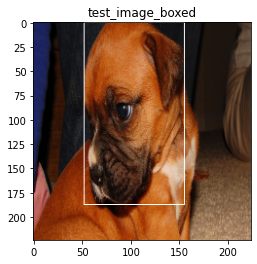

In [9]:
df = pd.read_csv("dataset/dataset.csv")
print(df.head())
test_file_name = "0_Cats_Test44.png"

test_image = cv.imread("dataset/imagedata/{}".format(test_file_name))
test_cords = np.array([[df[df["filename"]=="{}".format(test_file_name)]["x1n"].iloc[0], df[df["filename"]=="{}".format(test_file_name)]["y1n"].iloc[0], df[df["filename"]=="{}".format(test_file_name)]["x2n"].iloc[0], df[df["filename"]=="{}".format(test_file_name)]["y2n"].iloc[0]]]) * np.array([[224, 224, 224, 224]])
print(test_cords)
test_image_boxed = draw_rect(test_image, test_cords)
display_image(test_image_boxed, "test_image_boxed")

## Build the model and train

### Import libraries

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Load in the data and transform the data into the format ready for training

Load in the data.

In [3]:
inputs = []
outputs_bbox = []
outputs_label = []

df = pd.read_csv("dataset/dataset.csv")
for row in range(len(df['filename'])):
    filename = df.loc[row]['filename']
    image = load_img("./dataset/imagedata/{}".format(filename), target_size=(224, 224))
    image = img_to_array(image)
    inputs.append(image)
    outputs_bbox.append([df.loc[row]['x1n'], df.loc[row]['y1n'], df.loc[row]['x2n'], df.loc[row]['y2n']])
    outputs_label.append(df.loc[row]['label'])


Make all data ```np.ndarray``` and normalize them into the range 0-1. Also one-hot encode the categorical labels.

In [4]:
inputs = np.array(inputs, dtype="float32") / 255.0
outputs_bbox = np.array(outputs_bbox, dtype="float32")

le = LabelEncoder()
outputs_label = le.fit_transform(outputs_label) 
print(le.classes_)

outputs_label = to_categorical(outputs_label, dtype = 'int64') 


['cat' 'dog']


Split the data into train and test sets.

In [5]:
inputs_train, inputs_test, outputs_bbox_train, outputs_bbox_test, outputs_label_train, outputs_label_test= train_test_split(inputs, outputs_bbox, outputs_label, test_size=0.10, random_state=42)

### Perform transfer learning

Read in the pretrained VGG16 network and replace the fully-connected layer by two new heads that predict the bounding box coordinates and classfy whether it's cat or dog, respectively. Then fine tune the two new heads.

In [6]:
vgg16 = VGG16(weights="./VGG16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

vgg16.trainable = False    # this prevents the VGG16 without the top layer being trained

outputed = vgg16.output
outputed = Flatten()(outputed)

bbox_head = Dense(128, activation="relu")(outputed)
bbox_head = Dense(64, activation="relu")(bbox_head)
bbox_head = Dense(32, activation="relu")(bbox_head)
bbox_head = Dropout(0.2)(bbox_head)
bbox_head = Dense(4, activation="sigmoid", name="regressor")(bbox_head)

label_head = Dense(512, activation="relu")(outputed)
label_head = Dropout(0.5)(label_head)
label_head = Dense(512, activation="relu")(label_head)
label_head = Dropout(0.5)(label_head)
label_head = Dense(2, activation="softmax", name="classifier")(label_head)

model = Model(inputs=vgg16.input, outputs=(bbox_head, label_head))

losses = {
    "classifier": "categorical_crossentropy",
    "regressor": "mean_squared_error",
}

loss_weights = {
    "classifier": 1.0,
    "regressor": 1.0
}

outputs_train = {
    "classifier": outputs_label_train,
    "regressor": outputs_bbox_train
}

outputs_test = {
    "classifier": outputs_label_test,
    "regressor": outputs_bbox_test
}

model.compile(loss=losses, optimizer='Adam', metrics=["accuracy"], loss_weights=loss_weights)
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

Train the model.

In [7]:
history = model.fit(
    inputs_train, outputs_train,
    validation_data=(inputs_test, outputs_test),
    batch_size=10,
    epochs=20,
    verbose=1)

Epoch 1/20
54/54 [==============================] - 81s 1s/step - loss: 3.0751 - regressor_loss: 0.0722 - classifier_loss: 3.0029 - regressor_accuracy: 0.6315 - classifier_accuracy: 0.6407 - val_loss: 0.4208 - val_regressor_loss: 0.0189 - val_classifier_loss: 0.4020 - val_regressor_accuracy: 0.7667 - val_classifier_accuracy: 0.8167
Epoch 2/20
54/54 [==============================] - 78s 1s/step - loss: 0.8549 - regressor_loss: 0.0214 - classifier_loss: 0.8335 - regressor_accuracy: 0.7296 - classifier_accuracy: 0.7852 - val_loss: 0.3286 - val_regressor_loss: 0.0133 - val_classifier_loss: 0.3154 - val_regressor_accuracy: 0.8000 - val_classifier_accuracy: 0.8833
Epoch 3/20
54/54 [==============================] - 79s 1s/step - loss: 0.3475 - regressor_loss: 0.0171 - classifier_loss: 0.3304 - regressor_accuracy: 0.7204 - classifier_accuracy: 0.8833 - val_loss: 0.2030 - val_regressor_loss: 0.0115 - val_classifier_loss: 0.1915 - val_regressor_accuracy: 0.7333 - val_classifier_accuracy: 0.916

Display the training history.

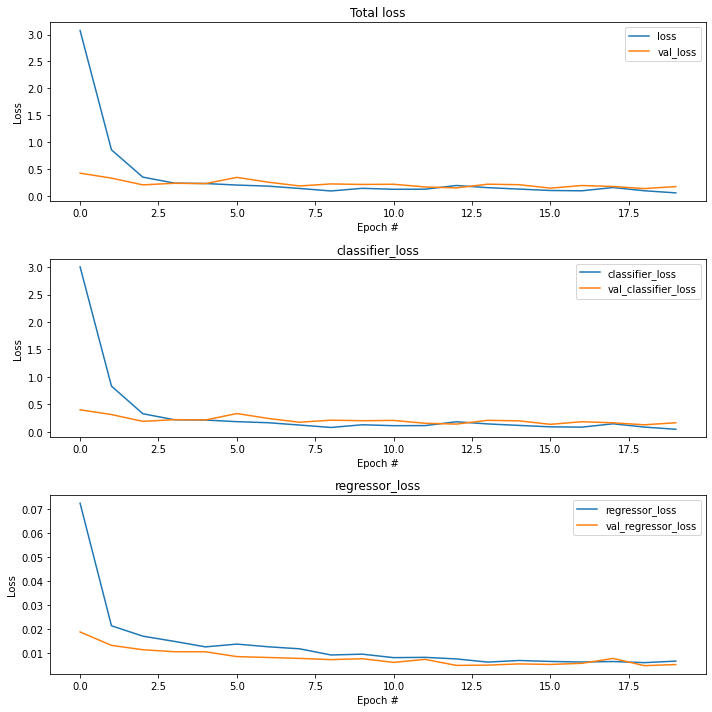

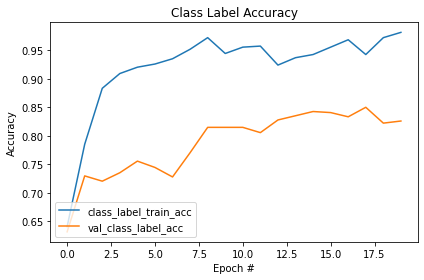

In [8]:
lossNames = ["loss", "classifier_loss", "regressor_loss"]
N = list(range(len(history.history['loss'])))
(fig, ax) = plt.subplots(3, 1, figsize=(10, 10))

for (i, l) in enumerate(lossNames):
    title = "{}".format(l) if l != "loss" else "Total loss"
    ax[i].set_title(title)
    ax[i].set_xlabel("Epoch #")
    ax[i].set_ylabel("Loss")
    ax[i].plot(N, history.history[l], label=l)
    ax[i].plot(N, history.history["val_" + l], label="val_" + l)
    ax[i].legend()
plt.tight_layout()
    
plt.figure()
plt.plot(N, history.history["classifier_accuracy"], label="class_label_train_acc")
plt.plot(N, history.history["regressor_accuracy"], label="val_class_label_acc")
plt.title("Class Label Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.tight_layout()

Save the model.

In [11]:
DIR = ("./dataset/imagedata")
IF_EXIST = os.path.isdir(DIR)

if not IF_EXIST:
    os.makedirs(DIR)
    print("creat a new folder : ", DIR)
else:
    print(DIR, "folder already exists.")
    
model.save('./model/model.h5', save_format="h5")

./dataset/imagedata folder already exists.


## Make predictions

### Import libraries

In [14]:
from tensorflow.keras.models import load_model
from PIL import Image

Load the model

In [17]:
model = load_model('./model/model.h5')

Inspect the performance of the model by making predictions on unseen pictures.

cat 0.99 (180, 42) (763, 453)
cat 1.00 (32, 8) (178, 181)
dog 1.00 (84, 38) (665, 702)
dog 1.00 (240, 15) (505, 223)


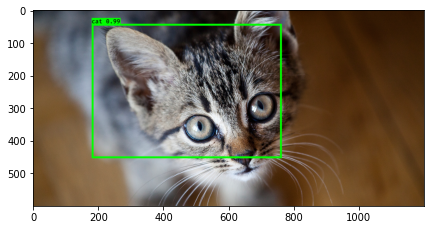

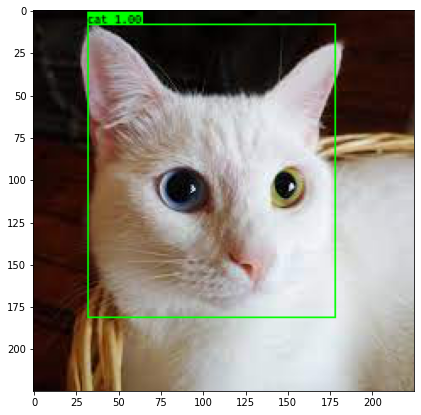

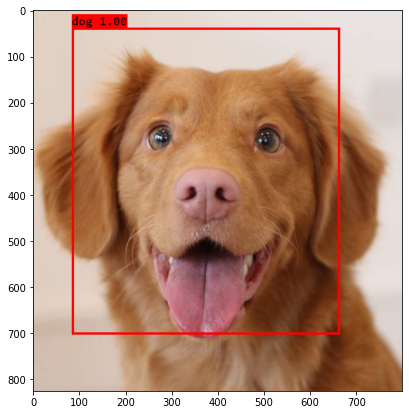

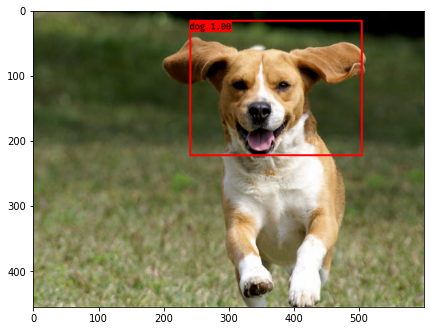

In [31]:
unseen_images = []
for i in range(1, 5):
    unseen_image = load_img("./dataset/unseen/u{}.png".format(i), target_size=(224, 224))
    unseen_image = img_to_array(unseen_image)
    unseen_image = np.array(unseen_image, dtype="float32") / 255.0
    unseen_images.append(unseen_image)
unseen_images = np.array(unseen_images)
unseen_image = unseen_image.reshape(-1, 224, 224, 3)
predicted = model.predict(unseen_images)

for i in range(1, 5):
    unseen_image = Image.open("./dataset/unseen/u{}.png".format(i))
    (width, height) = unseen_image.size[:2]
    coords = predicted[0][i-1] * [[width, height, width, height]]
    colors = generate_colors(label)
    draw_boxes(unseen_image, [np.max(predicted[1][i-1])], coords, [np.argmax(predicted[1][i-1])], le.classes_, colors)
    plt.figure(figsize=(7, 7))
    plt.imshow(unseen_image)
    